In [1]:
# https://github.com/bulletphysics/bullet3/tree/master/examples/pybullet/notebooks

import pybullet as p

In [2]:
p.connect(p.DIRECT)

0

In [3]:
p.loadURDF("plane.urdf")

0

In [4]:
r2d2=p.loadURDF("r2d2.urdf",[0,0,0.5])

In [5]:
p.getNumBodies()

2

In [6]:
for i in range (p.getNumJoints(r2d2)):
    jointInfo=p.getJointInfo(r2d2,i)
    print("joint",jointInfo[0],"name=",jointInfo[1].decode('ascii'))

joint 0 name= base_to_right_leg
joint 1 name= right_base_joint
joint 2 name= right_front_wheel_joint
joint 3 name= right_back_wheel_joint
joint 4 name= base_to_left_leg
joint 5 name= left_base_joint
joint 6 name= left_front_wheel_joint
joint 7 name= left_back_wheel_joint
joint 8 name= gripper_extension
joint 9 name= left_gripper_joint
joint 10 name= left_tip_joint
joint 11 name= right_gripper_joint
joint 12 name= right_tip_joint
joint 13 name= head_swivel
joint 14 name= tobox


In [7]:
p.setGravity(0,0,-10)
precision=5
for i in range (10):
    pos,orn = p.getBasePositionAndOrientation(r2d2)
    posmsg='pos = {posx:.{prec}f},{posy:.{prec}f},{posz:.{prec}f}   '.format(posx=pos[0],posy=pos[1],posz=pos[2], prec=precision)
    print(posmsg)
    p.stepSimulation()

pos = 0.00000,0.00000,0.50000   
pos = 0.00000,-0.00000,0.49983   
pos = 0.00000,-0.00000,0.49948   
pos = 0.00000,-0.00000,0.49896   
pos = 0.00000,-0.00000,0.49826   
pos = 0.00000,-0.00000,0.49740   
pos = 0.00000,-0.00000,0.49636   
pos = 0.00000,-0.00000,0.49514   
pos = 0.00000,-0.00000,0.49375   
pos = 0.00000,-0.00000,0.49219   


In [8]:
p.stepSimulation()

()

In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [14]:
camTargetPos = [0,0,0]
cameraUp = [0,0,1]
cameraPos = [1,1,1]

pitch = -10.0
yaw = 60
roll=0
upAxisIndex = 2
camDistance = 4
pixelWidth = 320
pixelHeight = 200
nearPlane = 0.01
farPlane = 100
fov = 60
viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)
aspect = pixelWidth / pixelHeight;
projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane);
img_arr = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1,lightDirection=[1,1,1])


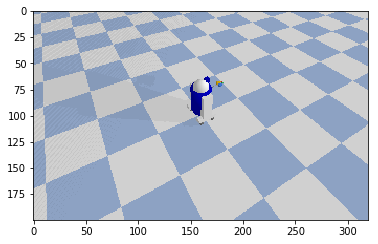

In [15]:
w=img_arr[0] #width of the image, in pixels
h=img_arr[1] #height of the image, in pixels
rgb=img_arr[2] #color data RGB
plt.imshow(rgb,interpolation='none')
plt.draw()
plt.show()